In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from audio.signal import *
from audio.const import *
from audio.function import *

In [3]:
# checkear que se importan bien las librerías
print(SRATE)
print(CHUNK)

48000
1024


## probamos unas cuantas señales

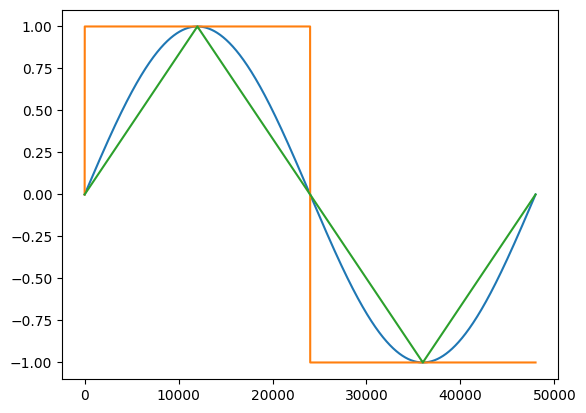

In [4]:
s = Sine(C(1))
c = Square(C(1))
t = Triangle(C(1))
plt.plot(s.next(SRATE))
plt.plot(c.next(SRATE))
plt.plot(t.next(SRATE))
# plt.show()

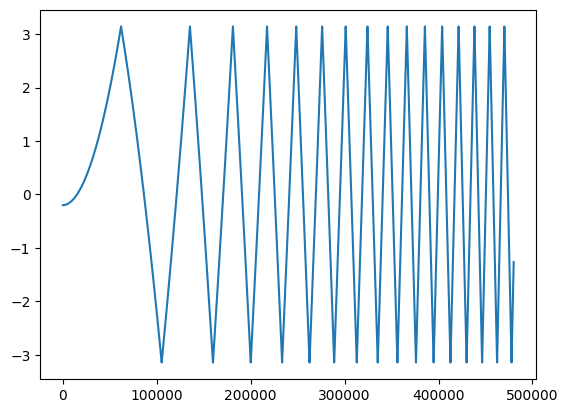

In [5]:
g = Function(np.sin, X(pow=C(2)) - C(.1))
f = Function(np.arcsin, g) * C(2)
plt.plot(f.next(SRATE*10))


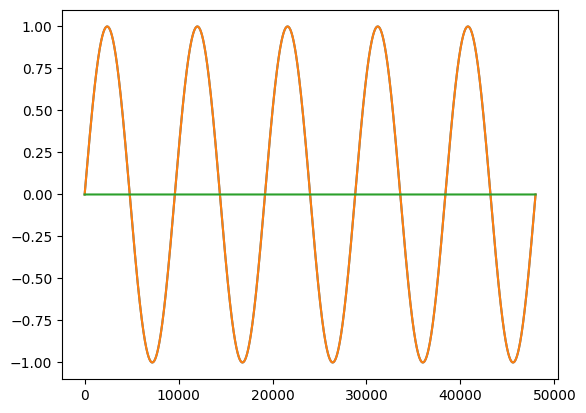

In [28]:
# podemos hacer señales de varias formas:
freq = C(5)
v1 = Sine(freq)
v2 = Function(np.sin, X(mul=C(2*np.pi)*freq))
plt.plot(v1.next(SRATE))
plt.plot(v2.next(SRATE))
plt.plot((v1 - v2).next(SRATE))  # la diferencia debe ser 0

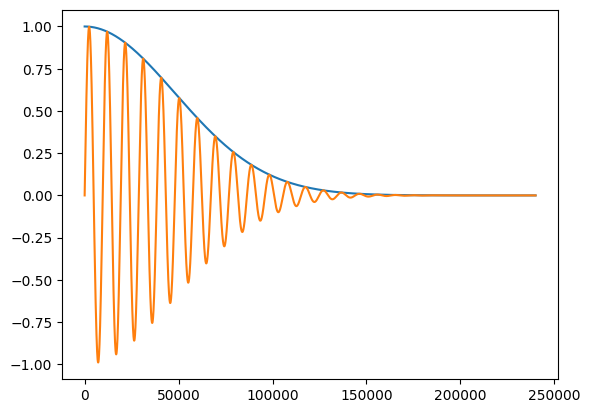

In [31]:
# gausian pulse
o = C(1)
freq = C(5)

gausian = Function(np.exp, -X(pow=C(2))/(C(2)*o**C(2)))
pulse = gausian * Sine(freq)

plt.plot(gausian.next(SRATE*5))
plt.plot(pulse.next(SRATE*5))

